In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
#import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
#Components used for signal - ACF,PSD
import scipy.signal

In [3]:
# Getting current working directory and storing it as a string variable and reading all empty seat readings into one dataframe

directory_in_str = "E:\\Haritha\\MasterThesis\\ModelTraining\\aa_measurements\\FFTfilegenerationpurpose\\fft_train"
Emptyfilelist = []
empty = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str) :
    if file.startswith("Part") :
        print(file)
        filepathempty = directory_in_str +"\\" + file
        df1 = pd.read_csv(filepathempty, engine = 'python')
        empty  = empty.append(df1)
    else :
        continue  

empty.head()

Adding the following files : 
Part1.2.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_2232\484658867.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


Part1.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_2232\484658867.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


Part2.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_2232\484658867.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


Part3.2.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_2232\484658867.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


Part3.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_2232\484658867.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


Part4.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_2232\484658867.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


,600,601,602,603,604,605,606,607,608,609,...,791,792,793,794,795,796,797,798,799,Label
0,6.068504e-07,6.852269e-07,9.041068e-07,7.069943e-07,8.895218e-07,9.664558e-07,0.000001,0.000002,0.000003,0.000003,...,0.000035,0.000040,0.000028,0.000024,0.000034,0.000041,0.000034,0.000026,0.000041,0
1,1.669686e-06,1.978055e-06,1.869322e-06,2.681205e-06,2.700845e-06,2.393160e-06,0.000003,0.000003,0.000003,0.000003,...,0.000033,0.000044,0.000035,0.000025,0.000037,0.000047,0.000038,0.000028,0.000044,0
2,3.730199e-06,5.088352e-06,2.764420e-06,1.791014e-06,3.944355e-06,4.744577e-06,0.000003,0.000003,0.000005,0.000004,...,0.000031,0.000039,0.000039,0.000029,0.000033,0.000052,0.000047,0.000029,0.000048,0
3,2.410132e-06,1.558534e-06,3.560159e-06,5.279946e-06,3.557908e-06,2.598881e-06,0.000005,0.000006,0.000004,0.000003,...,0.000036,0.000053,0.000038,0.000023,0.000038,0.000054,0.000040,0.000026,0.000046,0
4,2.274934e-06,2.255291e-06,1.720882e-06,1.749662e-06,1.420492e-06,1.806817e-06,0.000002,0.000002,0.000003,0.000004,...,0.000050,0.000044,0.000024,0.000023,0.000035,0.000035,0.000026,0.000033,0.000060,0


In [5]:
total2 = pd.DataFrame()
total2 = total2.append(empty)
total2.shape


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_2232\3556709548.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total2 = total2.append(empty)


(13580, 201)

In [7]:
lengthvar = len(total2)
lengthvar

13580

In [8]:
train, test = train_test_split(total2, test_size=0.2, random_state=42, shuffle=True)

In [9]:
test.shape

(2716, 201)

In [10]:
X_train = train.iloc[:,0:200] 
#X_train = X_train/1000 - already divided by max
y_train = train['Label']

X_test = test.iloc[:,0:200] 
#X_test = X_test/1000 - already divided by max
y_test = test['Label']

In [12]:
X_train.head()

,600,601,602,603,604,605,606,607,608,609,...,790,791,792,793,794,795,796,797,798,799
1416,1.098710e-05,1.707907e-05,2.229720e-05,1.696232e-05,2.352336e-05,2.489441e-05,1.970047e-05,2.604308e-05,3.002448e-05,2.349230e-05,...,0.000010,0.000011,0.000025,0.000026,0.000017,0.000032,0.000044,0.000037,0.000034,0.000038
662,3.641956e-06,5.170922e-06,5.921516e-06,3.949193e-06,3.819921e-06,6.072452e-06,6.713343e-06,6.205111e-06,4.947522e-06,4.784267e-06,...,0.000051,0.000039,0.000035,0.000039,0.000035,0.000029,0.000031,0.000036,0.000035,0.000028
407,5.036178e-06,1.619263e-05,1.966626e-05,8.929927e-06,3.859434e-06,1.257105e-05,2.529388e-05,2.369773e-05,9.652858e-06,3.443826e-06,...,0.000069,0.000074,0.000046,0.000022,0.000029,0.000042,0.000026,0.000010,0.000013,0.000027
1698,6.202150e-07,6.609623e-07,6.530720e-07,7.920582e-07,5.857586e-07,5.725187e-07,6.577190e-07,6.585098e-07,7.467700e-07,7.259939e-07,...,0.000041,0.000038,0.000044,0.000054,0.000052,0.000046,0.000049,0.000059,0.000059,0.000047
761,2.651108e-05,2.768010e-05,2.550593e-05,2.570799e-05,2.603656e-05,2.556311e-05,2.514980e-05,2.700761e-05,2.467985e-05,2.106626e-05,...,0.000046,0.000047,0.000059,0.000060,0.000049,0.000043,0.000046,0.000065,0.000077,0.000060


In [13]:
y_train.head()

1416    1
662     0
407     1
1698    1
761     1
Name: Label, dtype: int64

In [14]:
#Testing out feature importances with ExtraTrees Regressor Model

regmod = ExtraTreesRegressor()
regmod.fit(X_train,y_train)

#print(regmod.feature_importances_)

ExtraTreesRegressor()

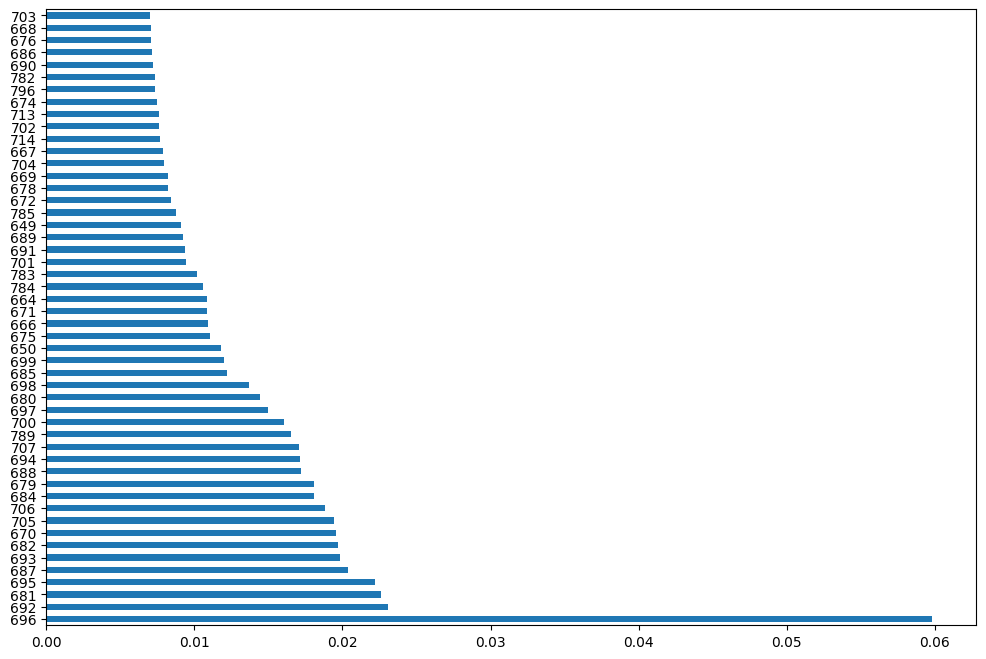

In [15]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(regmod.feature_importances_, index=X_train.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

#### The above feature importances relate to the ADC data columns directly